In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('results/peerProxyLatency.csv')
df

,Trials,Size Response (bytes),Time,Average Latency (ms),Num Packets Transferred
0,100,1,342.1,3.421000,0.000016
1,100,4,297.2,2.972000,0.000065
2,100,16,310.5,3.105000,0.000260
3,100,63,319.1,3.191000,0.001025
4,100,251,282.7,2.827000,0.004085
5,100,1000,333.8,3.338000,0.016276
6,100,3981,1253.4,12.534000,0.064795
7,100,15849,605.2,6.052000,0.257959
8,100,63096,2585.2,25.852000,1.026953
9,100,251189,9293.8,92.938000,4.088363


<Axes: xlabel='Trials'>

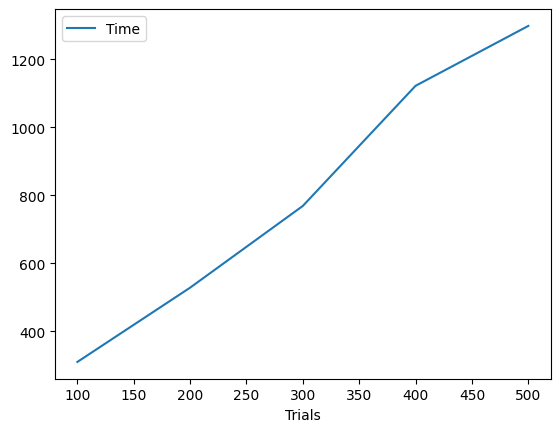

In [4]:
# todo: make one for each size
df[df['Size Response (bytes)'] == 16].plot(x='Trials', y='Time', kind="line")

In [5]:
byTrial = df.groupby('Trials').mean()
byTrial

,Size Response (bytes),Time,Average Latency (ms),Num Packets Transferred
Trials,,,,
100,33545.0,1562.30,15.623000,0.54598
200,33545.0,3072.64,15.363200,0.54598
300,33545.0,4588.52,15.295067,0.54598
400,33545.0,6293.42,15.733550,0.54598
500,33545.0,7935.43,15.870860,0.54598


<Axes: xlabel='Trials'>

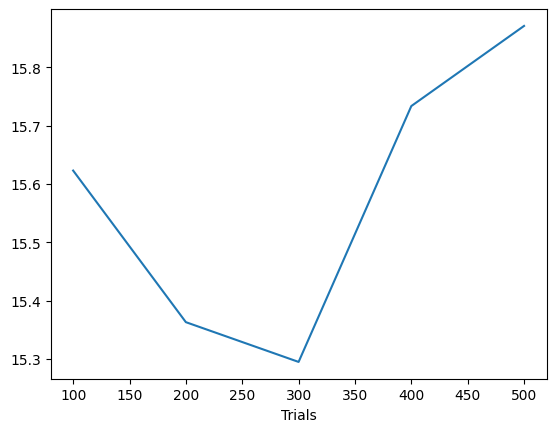

In [6]:
# graph trials by time
byTrial['Average Latency (ms)'].plot(kind='line')

In [7]:
bySize = df.groupby('Size Response (bytes)').mean()
bySize

,Trials,Time,Average Latency (ms),Num Packets Transferred
Size Response (bytes),,,,
1,300.0,1486.76,5.341870,0.000016
4,300.0,814.52,2.744593,0.000065
16,300.0,805.76,2.742913,0.000260
63,300.0,797.24,2.724600,0.001025
251,300.0,748.98,2.563703,0.004085
1000,300.0,832.48,2.811720,0.016276
3981,300.0,1108.56,4.919077,0.064795
15849,300.0,2624.48,8.373467,0.257959
63096,300.0,7965.88,26.298133,1.026953


In [8]:
# make a plot that is a scatter plot and add regression line
def plot_with_regression(df):
    X = df['Size Response (bytes)']
    y = df['Average Latency (ms)']

    model = LinearRegression()
    model.fit(X.values.reshape(-1, 1), y)

    plt.figure(figsize=(10, 5))
    plt.scatter(X, y)
    plt.plot(X, model.predict(X.values.reshape(-1, 1)), color='red', linestyle='--')
    plt.xlabel('Size Response (bytes)')
    plt.ylabel('Average Latency (ms)')
    r_squared = model.score(X.values.reshape(-1, 1), y)

    print(r_squared)
    print("Slope: ", model.coef_[0])
    print("Intercept: ", model.intercept_)


0.9940682087129172
Slope:  0.00037470973336750836
Intercept:  3.007497327506636


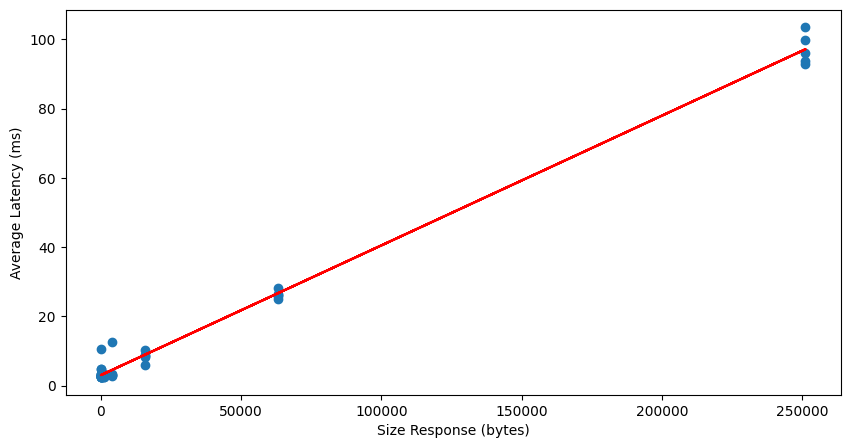

In [9]:
# TODO: make plot with consistent trial size (300)

plot_with_regression(df)

In [10]:
ngrok = pd.read_csv('results/ngrokLatency.csv')
ngrok

,Trials,Size Response (bytes),Time,Average Latency (ms),Num Packets Transferred
0,100,1,259.4,2.594000,0.000016
1,100,4,296.6,2.966000,0.000065
2,100,16,326.5,3.265000,0.000260
3,100,63,358.8,3.588000,0.001025
4,100,251,222.3,2.223000,0.004085
5,100,1000,301.1,3.011000,0.016276
6,100,3981,289.4,2.894000,0.064795
7,100,15849,297.7,2.977000,0.257959
8,100,63096,307.6,3.076000,1.026953
9,100,251189,354.5,3.545000,4.088363


<Axes: xlabel='Trials'>

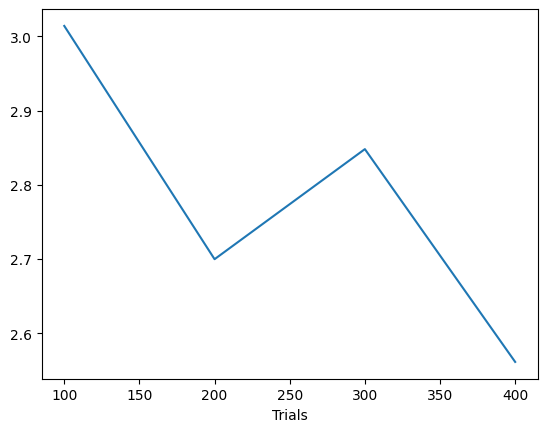

In [11]:
ngrok.groupby('Trials').mean()['Average Latency (ms)'].plot(kind='line')

0.2189768838730729
Slope:  3.934033738057724e-06
Intercept:  2.6489057549298534


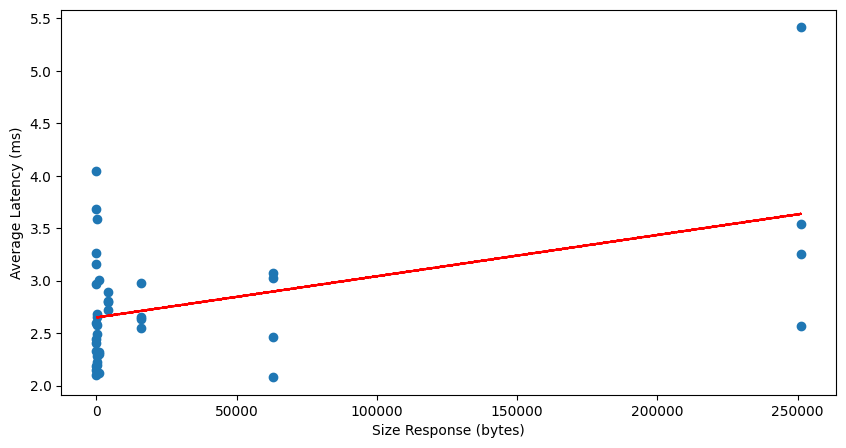

In [12]:
plot_with_regression(ngrok)

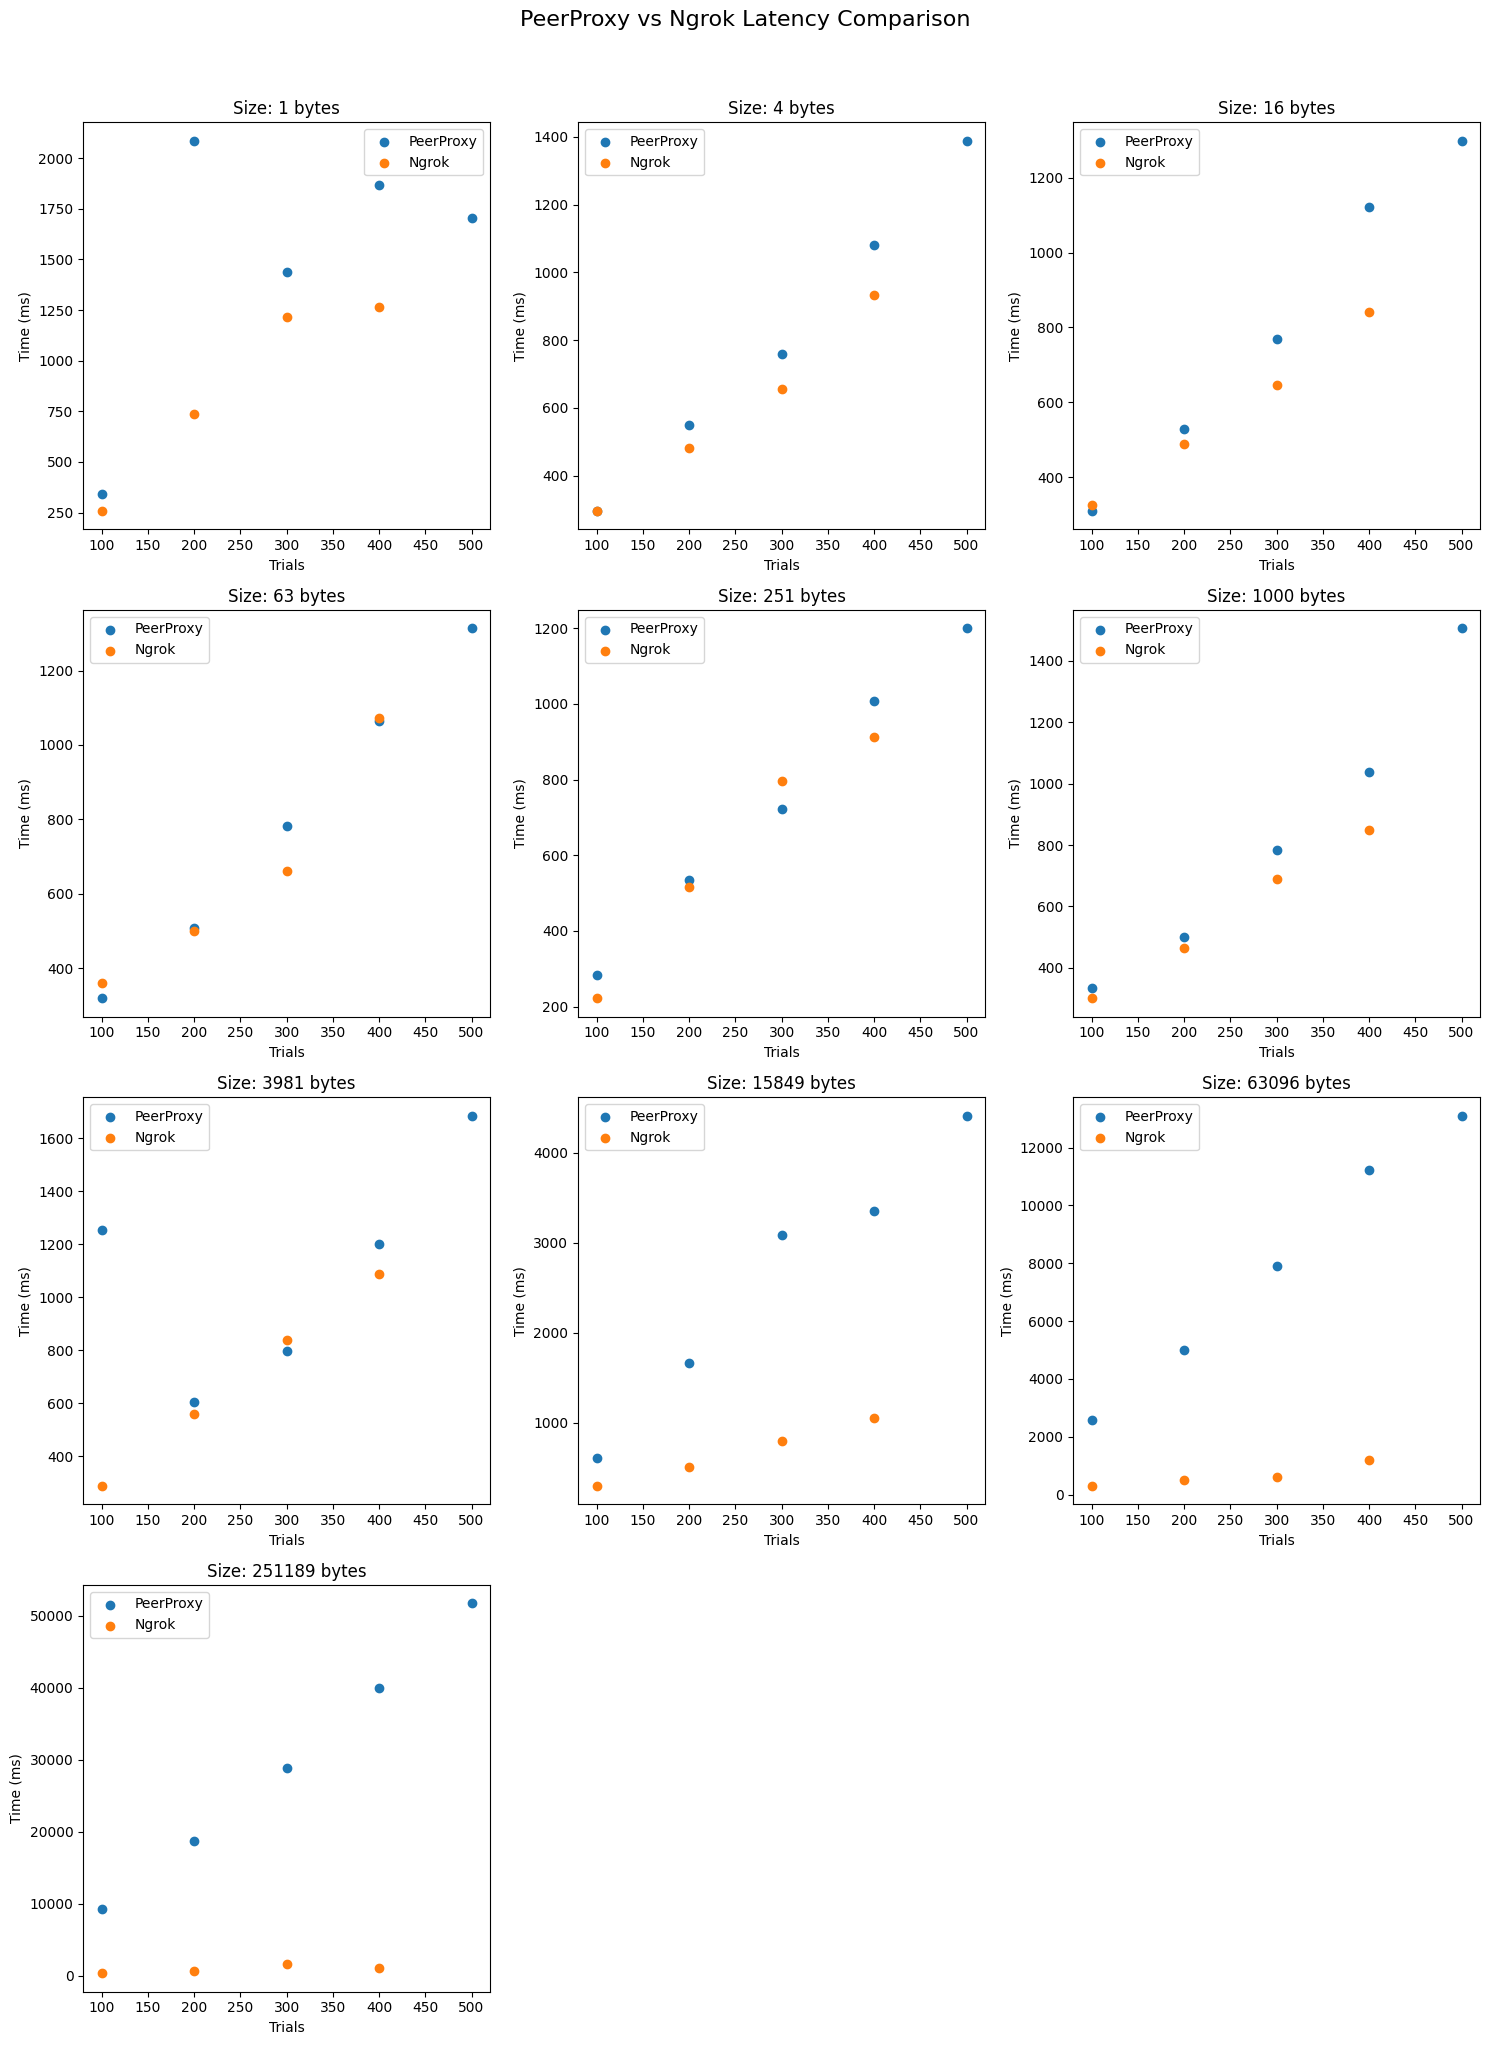

In [21]:
def plot_latency_comparison(dfs, labels, title, n_cols=3, figsize=(15, 5)):
    # Get unique Size Response (bytes) values from the first dataframe
    sizes = sorted(dfs[0]['Size Response (bytes)'].unique())

    # Calculate grid dimensions
    n_plots = len(sizes)
    n_rows = (n_plots + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1] * n_rows))
    fig.suptitle(title, fontsize=16, y=1.02)

    # Add more space between title and subplots
    plt.subplots_adjust(top=0.95)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    for i, size in enumerate(sizes):
        ax = axes[i]
        
        for df, label in zip(dfs, labels):
            df_size = df[df['Size Response (bytes)'] == size]
            ax.scatter(df_size['Trials'], df_size['Time'], label=label)
        
        ax.set_xlabel('Trials')
        ax.set_ylabel('Time (ms)')
        ax.set_title(f'Size: {size} bytes')
        ax.legend()

    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_latency_comparison([df, ngrok], ['PeerProxy', 'Ngrok'], 'PeerProxy vs Ngrok Latency Comparison')

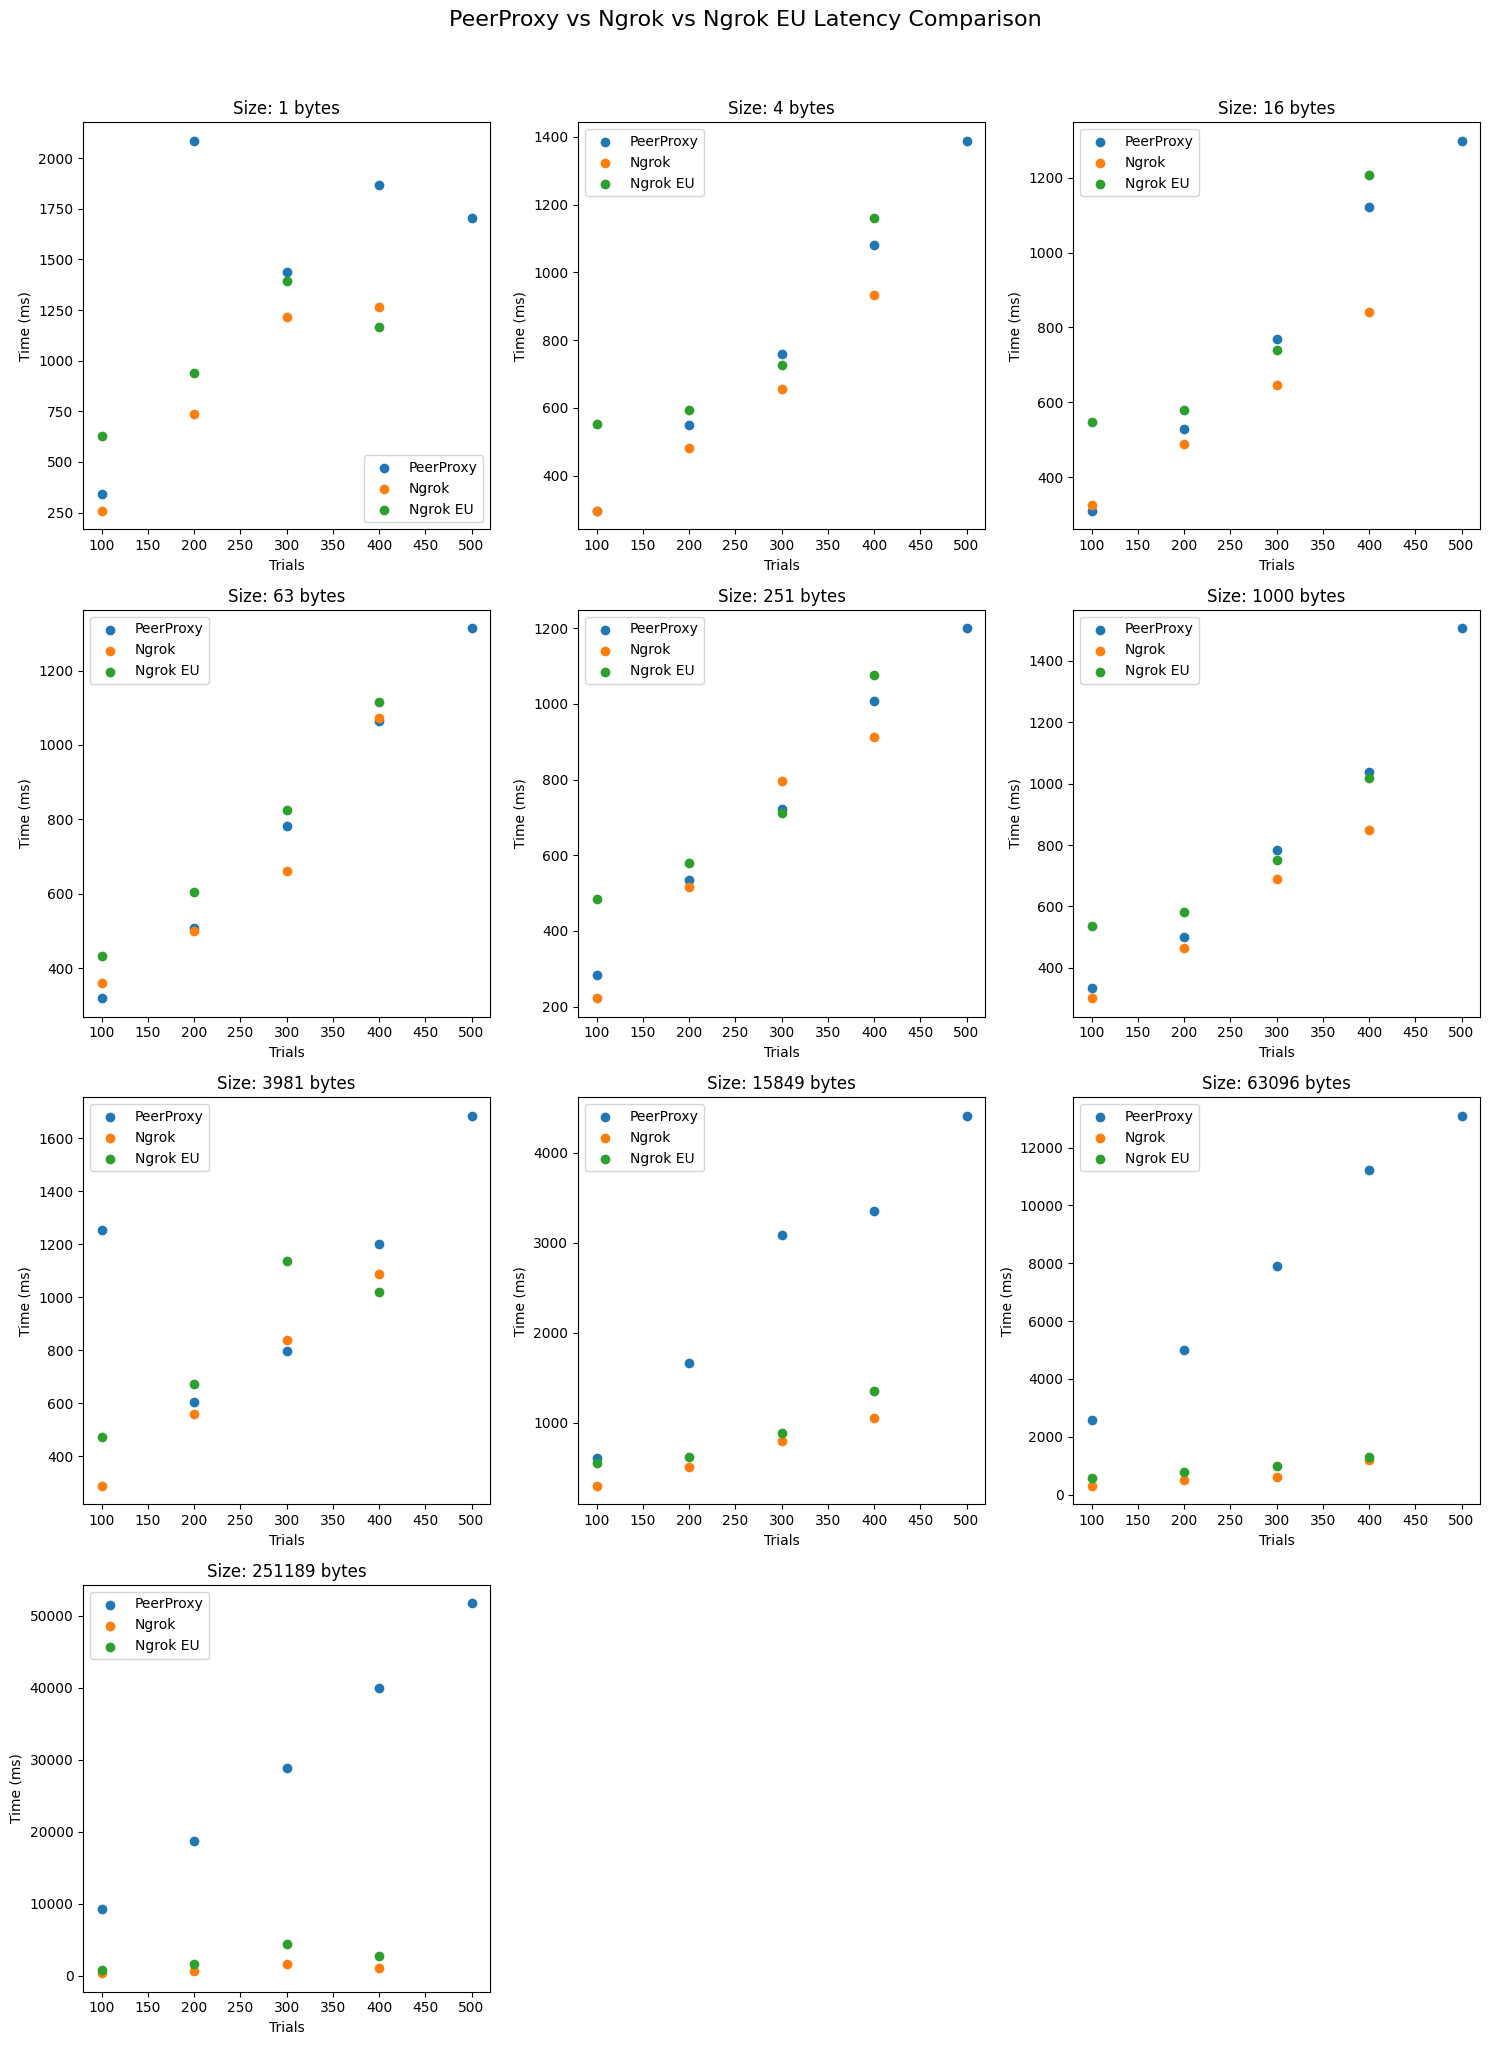

In [22]:

euNgrok = pd.read_csv('results/ngrokEuLatency.csv')

plot_latency_comparison([df, ngrok, euNgrok], ['PeerProxy', 'Ngrok', 'Ngrok EU'], 'PeerProxy vs Ngrok vs Ngrok EU Latency Comparison')

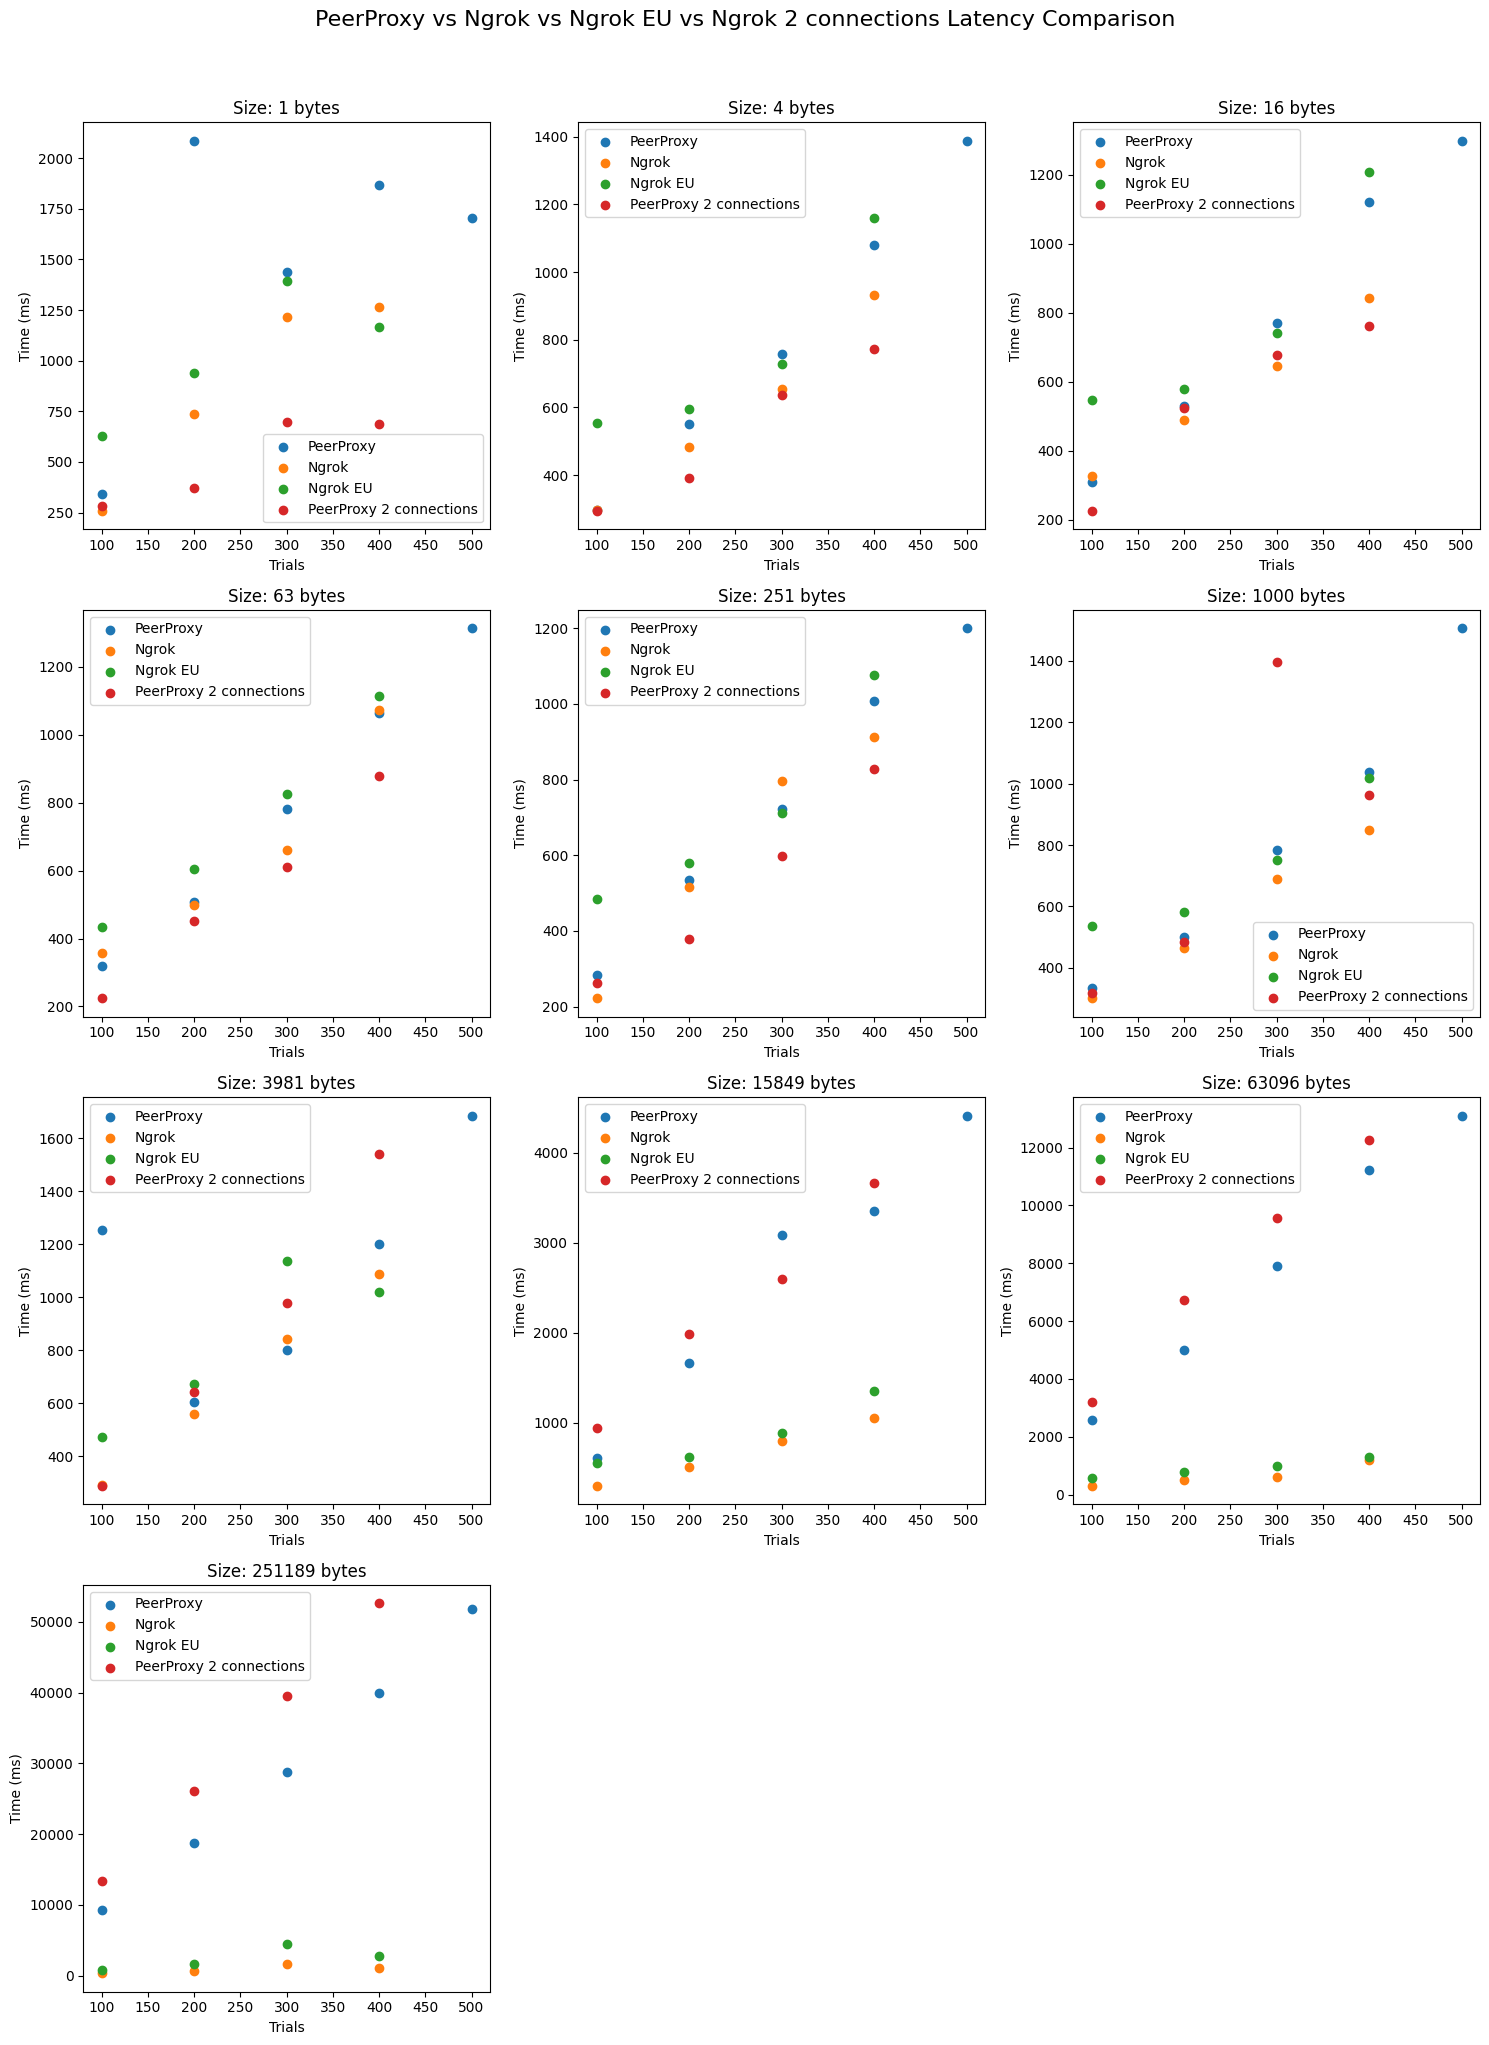

In [28]:
doubleConnection = pd.read_csv('results/twoConnectedLatencyBench.csv')

plot_latency_comparison([df, ngrok, euNgrok, doubleConnection], ['PeerProxy', 'Ngrok', 'Ngrok EU', 'PeerProxy 2 connections'], 'PeerProxy vs Ngrok vs Ngrok EU vs Ngrok 2 connections Latency Comparison')